# 6.4: Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Data prep for regression analysis 
#### 4. Regression analysis

## 1. import libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 6/World Life Expectancy Analysis'

In [4]:
# Import dataset
life_expectancy = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'life_expectancy_clean.csv'))

## 2. Data Cleaning

In [5]:
life_expectancy.columns

Index(['Unnamed: 0', 'country', 'year', 'status', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'Measles ', 'BMI', 'under-five deaths ', 'polio_immunizations',
       'Diphtheria ', 'HIV/AIDS_deaths', 'GDP', 'population',
       ' thinness  1-19 years', 'thinness_5-9_years',
       'income_composition_of_resources'],
      dtype='object')

In [6]:
life_expectancy = life_expectancy.drop(columns = ['Unnamed: 0'])

In [7]:
life_expectancy.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,Measles,BMI,under-five deaths,polio_immunizations,Diphtheria,HIV/AIDS_deaths,GDP,population,thinness 1-19 years,thinness_5-9_years,income_composition_of_resources
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,327582.0,17.5,17.5,0.476
1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,31731688.0,17.7,17.7,0.470
2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,3696958.0,17.9,18.0,0.463
3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,2978599.0,18.2,18.2,0.454
4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,1989,16.7,102,66,66,0.1,553.328940,2883167.0,18.4,18.4,0.448


In [8]:
life_expectancy.shape

(2700, 19)

## 3. Data prep for regression analysis 


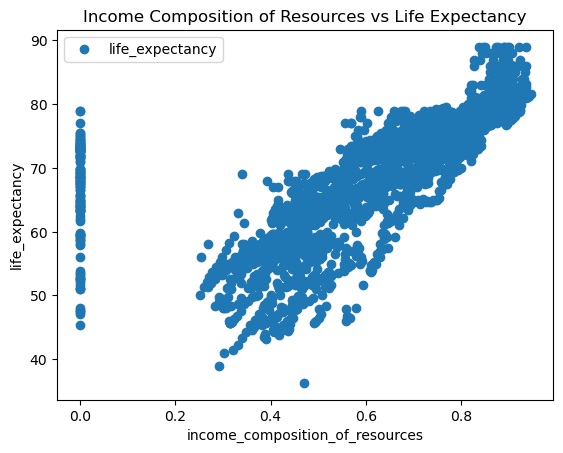

In [9]:
# Create a scatterplot using matplotlib

life_expectancy.plot(x = 'income_composition_of_resources', y='life_expectancy',style='o')
plt.title('Income Composition of Resources vs Life Expectancy')  
plt.xlabel('income_composition_of_resources')  
plt.ylabel('life_expectancy')  
plt.show()

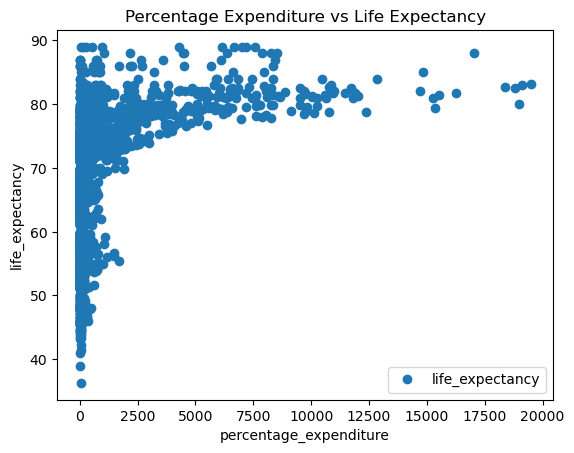

In [10]:
life_expectancy.plot(x = 'percentage_expenditure', y='life_expectancy',style='o')
plt.title('Percentage Expenditure vs Life Expectancy')  
plt.xlabel('percentage_expenditure')  
plt.ylabel('life_expectancy')  
plt.show()

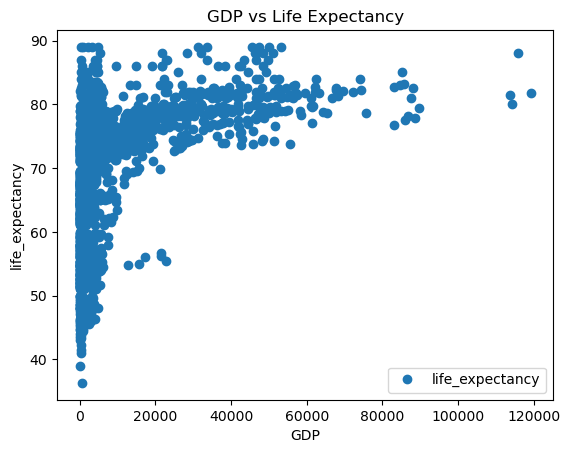

In [11]:
life_expectancy.plot(x = 'GDP', y='life_expectancy',style='o')
plt.title('GDP vs Life Expectancy')  
plt.xlabel('GDP')  
plt.ylabel('life_expectancy')  
plt.show()

#### Hypothesis
Life expectancy is largely affected by a countries income composition of resources.

In [12]:
# Reshape the variables into NumPy arrays

x = life_expectancy['income_composition_of_resources'].values.reshape(-1,1)
y = life_expectancy['life_expectancy'].values.reshape(-1,1)

In [13]:
x

array([[0.476],
       [0.47 ],
       [0.463],
       ...,
       [0.427],
       [0.427],
       [0.434]])

In [14]:
y

array([[59.9],
       [59.9],
       [59.5],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [15]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

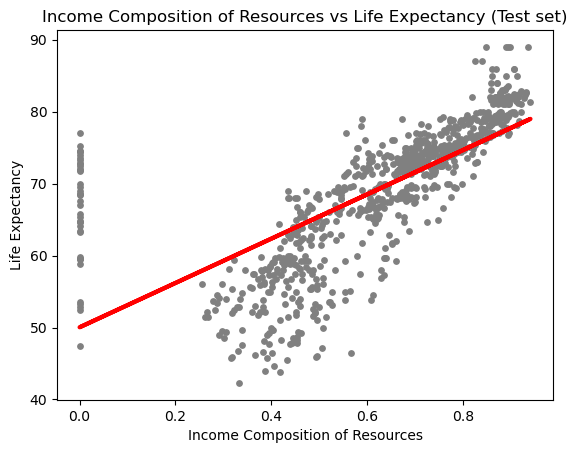

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Income Composition of Resources vs Life Expectancy (Test set)')
plot_test.xlabel('Income Composition of Resources')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[30.78371861]]
Mean squared error:  46.924967800065005
R2 score:  0.5051995495176513


In [22]:
y_predicted

array([[78.72236794],
       [63.08423889],
       [63.73069698],
       [71.30349176],
       [73.27364975],
       [65.33145035],
       [61.79132271],
       [76.93691226],
       [65.23909919],
       [74.41264734],
       [71.51897779],
       [75.21302402],
       [75.55164492],
       [64.50028994],
       [62.62248311],
       [74.04324271],
       [72.16543588],
       [66.07025959],
       [76.44437276],
       [62.99188773],
       [50.0319422 ],
       [64.68499226],
       [76.41358905],
       [77.70650523],
       [62.34542964],
       [76.19810302],
       [65.76242241],
       [65.54693638],
       [69.67195467],
       [72.56562422],
       [63.36129236],
       [73.27364975],
       [77.15239829],
       [66.59358281],
       [76.5059402 ],
       [76.35202161],
       [74.19716131],
       [63.85383185],
       [72.01151728],
       [72.78111025],
       [70.90330341],
       [65.05439688],
       [72.71954281],
       [50.0319422 ],
       [72.59640794],
       [62

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,82.7,78.722368
1,59.6,63.084239
2,48.5,63.730697
3,68.1,71.303492
4,72.8,73.273650
5,68.5,65.331450
6,52.8,61.791323
7,78.8,76.936912
8,56.8,65.239099
9,75.2,74.412647


In [24]:
# Predict

y_predicted_train = regression.predict(x_train)

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[30.78371861]]
Mean squared error:  45.00631701151918
R2 score:  0.4902736722123635


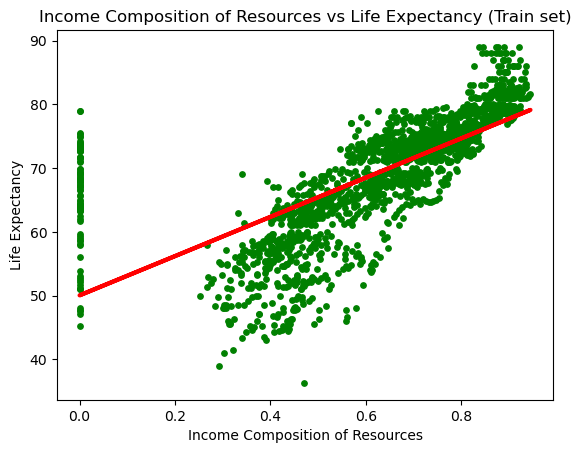

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Income Composition of Resources vs Life Expectancy (Train set)')
plot_test.xlabel('Income Composition of Resources')
plot_test.ylabel('Life Expectancy')
plot_test.show()

I think the line fits the data fairly well. The 0s in the income composition of resources is throwing off the life I think causing the prediction to be higher for lower income composition of resources than the majority of data is actually showing.

The model performed very well on the test set. I think if the extreme values of 0 were not affecting it it would have been able to create an even better prediction. I do not think there is any bias in this model. In this example I dont see any patterns that could create potential bias in the predictions.  